In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [5]:
fileUpload = '/Users/manasmaskar/Rutgers/Projects/customerChurn/customerChurn/datasets/credit_risk_dataset.csv'
mainData = pd.read_csv(fileUpload)
mainData

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

missing_values = mainData.isnull().sum()

if missing_values.any():
    print(missing_values[missing_values > 0])
else:
    print("No missing values in the dataset.")

person_emp_length     895
loan_int_rate        3116
dtype: int64


/var/folders/yn/6zjkxhgs3t17blkvg88x2nbr0000gn/T/ipykernel_20723/3984419035.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


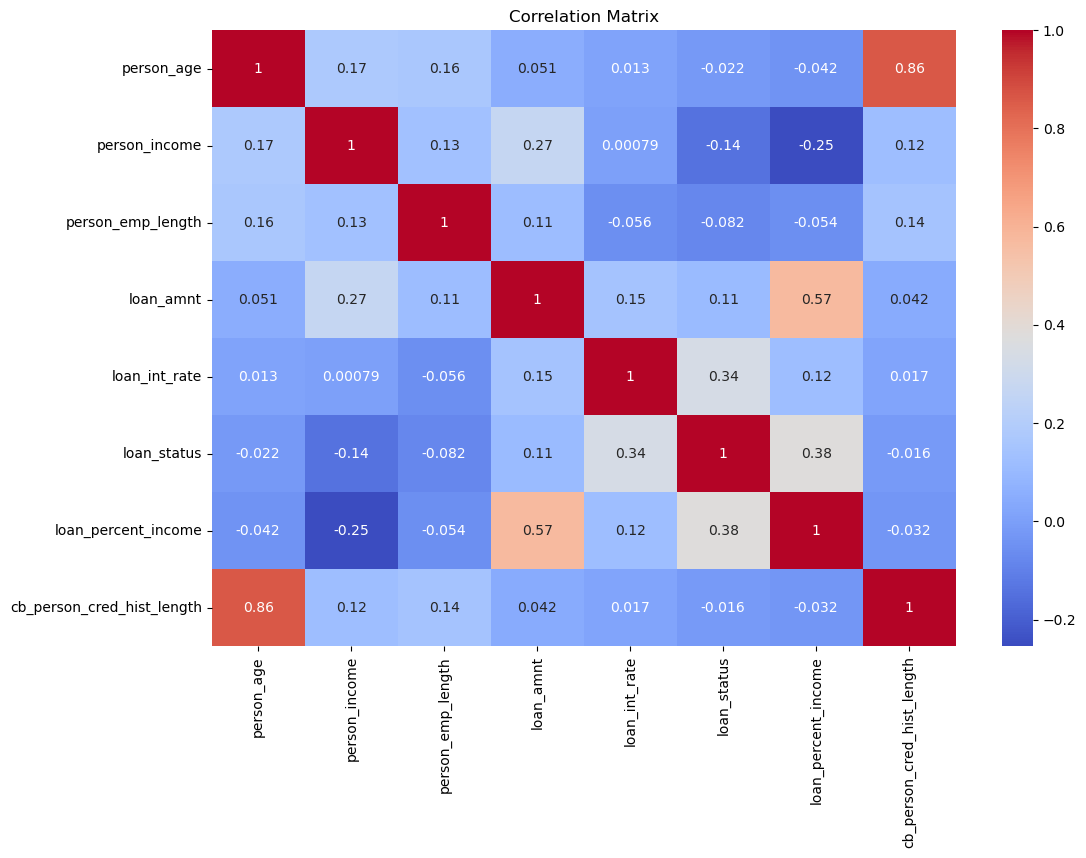

In [18]:
data = mainData
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data_subset = data[['person_emp_length', 'loan_int_rate']]

knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data_subset), columns=data_subset.columns)

mice_imputer = IterativeImputer()
data_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(data_subset), columns=data_subset.columns)

print("KNN Imputed Data:")
print(data_knn_imputed.head())

print("\nMICE Imputed Data:")
print(data_mice_imputed.head())


KNN Imputed Data:
   person_emp_length  loan_int_rate
0              123.0          16.02
1                5.0          11.14
2                1.0          12.87
3                4.0          15.23
4                8.0          14.27

MICE Imputed Data:
   person_emp_length  loan_int_rate
0              123.0          16.02
1                5.0          11.14
2                1.0          12.87
3                4.0          15.23
4                8.0          14.27


In [22]:
missing_values = data_knn_imputed.isnull().sum()

if missing_values.any():
    print(missing_values[missing_values > 0])
else:
    print("No missing values in the dataset.")

missing_values = data_mice_imputed.isnull().sum()

if missing_values.any():
    print(missing_values[missing_values > 0])
else:
    print("No missing values in the dataset.")

No missing values in the dataset.
No missing values in the dataset.


In [27]:
dataKnn = data
dataMice = data

In [28]:
#for KNN Imputation
dataKnn['person_emp_length'] = data_knn_imputed['person_emp_length']
dataKnn['loan_int_rate'] = data_knn_imputed['loan_int_rate']

#for MICE Imputation
dataMice['person_emp_length'] = data_knn_imputed['person_emp_length']
dataMice['loan_int_rate'] = data_knn_imputed['loan_int_rate']

In [33]:
missing_values = dataMice.isnull().sum()    #Replace dataMice with dataKnn to check for Knn 

if missing_values.any():
    print(missing_values[missing_values > 0])
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [34]:
X_knn = dataKnn.drop('loan_status', axis=1)
y_knn = dataKnn['loan_status']
X_mice = dataMice.drop('loan_status', axis=1)
y_mice = dataMice['loan_status']

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)
X_train_mice, X_test_mice, y_train_mice, y_test_mice = train_test_split(X_mice, y_mice, test_size=0.2, random_state=42)


model_knn = LogisticRegression(random_state=42)
model_knn.fit(X_train_knn, y_train_knn)

# Train a Logistic Regression model on MICE imputed data
model_mice = LogisticRegression(random_state=42)
model_mice.fit(X_train_mice, y_train_mice)

# Predict on the test sets
y_pred_knn = model_knn.predict(X_test_knn)
y_pred_proba_knn = model_knn.predict_proba(X_test_knn)[:, 1]

y_pred_mice = model_mice.predict(X_test_mice)
y_pred_proba_mice = model_mice.predict_proba(X_test_mice)[:, 1]

# Evaluate the models
def evaluate_model(y_test, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    return accuracy, precision, recall, f1, roc_auc

metrics_knn = evaluate_model(y_test_knn, y_pred_knn, y_pred_proba_knn)
metrics_mice = evaluate_model(y_test_mice, y_pred_mice, y_pred_proba_mice)

print(f'KNN Imputation - Accuracy: {metrics_knn[0]:.4f}, Precision: {metrics_knn[1]:.4f}, Recall: {metrics_knn[2]:.4f}, F1 Score: {metrics_knn[3]:.4f}, ROC AUC: {metrics_knn[4]:.4f}')
print(f'MICE Imputation - Accuracy: {metrics_mice[0]:.4f}, Precision: {metrics_mice[1]:.4f}, Recall: {metrics_mice[2]:.4f}, F1 Score: {metrics_mice[3]:.4f}, ROC AUC: {metrics_mice[4]:.4f}')


ValueError: could not convert string to float: 'RENT'

In [37]:
dataKnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [39]:
dataKnn.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789512,9589.371106,11.032027,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.091738,6322.086646,3.116467,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.280000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<h4>Here we can see that most of the columns have significant outliers like in columns -->
Person_AGE, person_INCOME, person_EMP_LENGTH, loan_AMOUNT, cred_HIST thus applying RobustScaler here and on rest of the columns applying Standard Scaler or MinMax Scaler depending on the Distribution


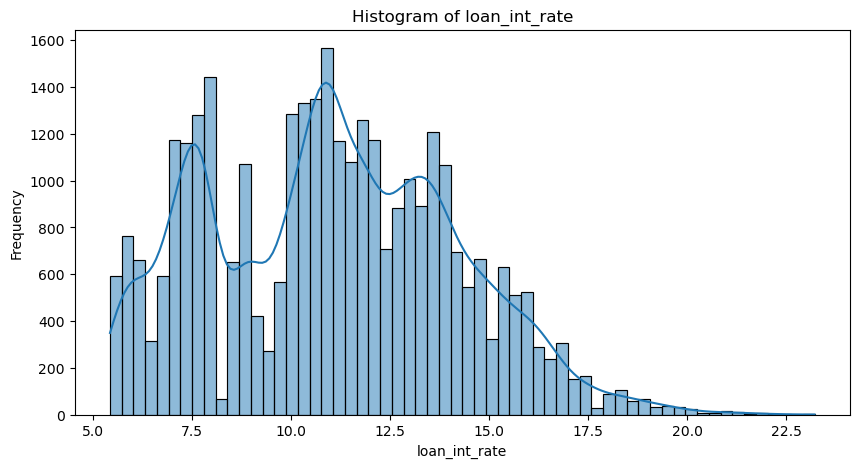

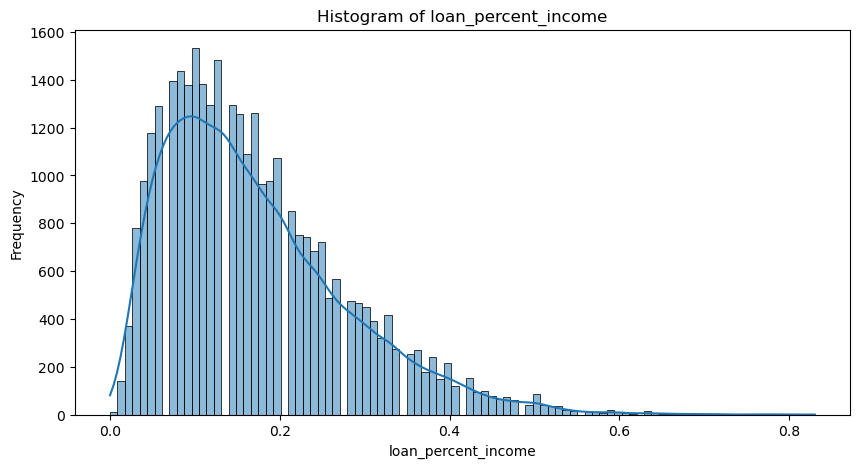

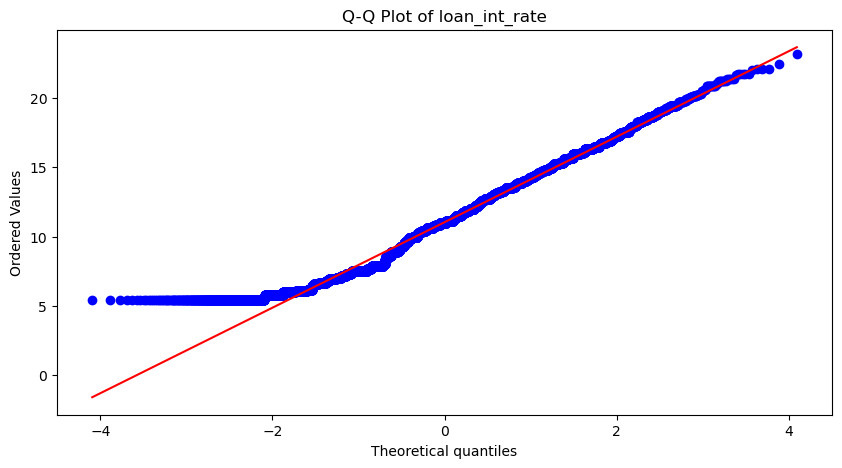

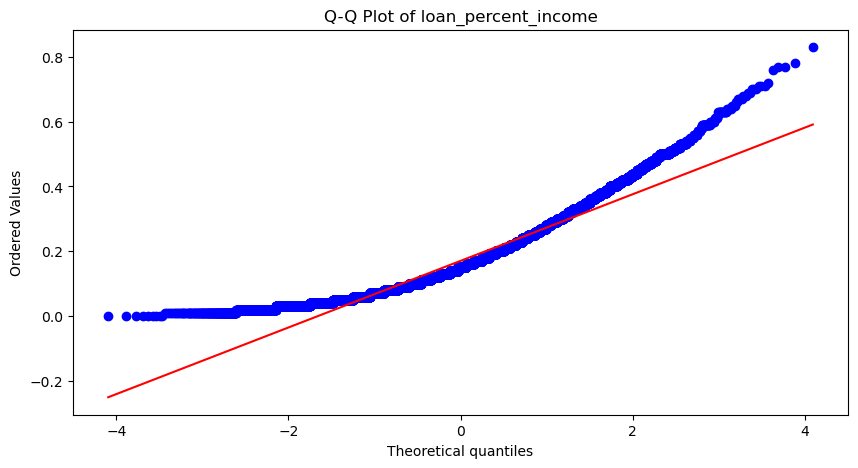

In [41]:
import scipy.stats as stats
columns_to_check = ['loan_int_rate', 'loan_percent_income']

# Plot histograms
for column in columns_to_check:
    plt.figure(figsize=(10, 5))
    sns.histplot(dataKnn[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot Q-Q plots
for column in columns_to_check:
    plt.figure(figsize=(10, 5))
    stats.probplot(dataKnn[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()

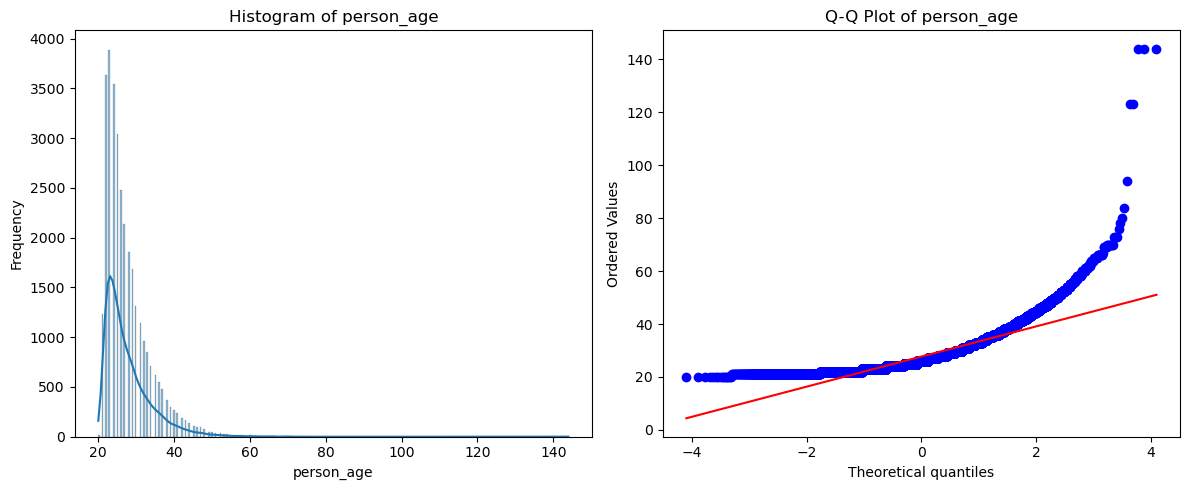

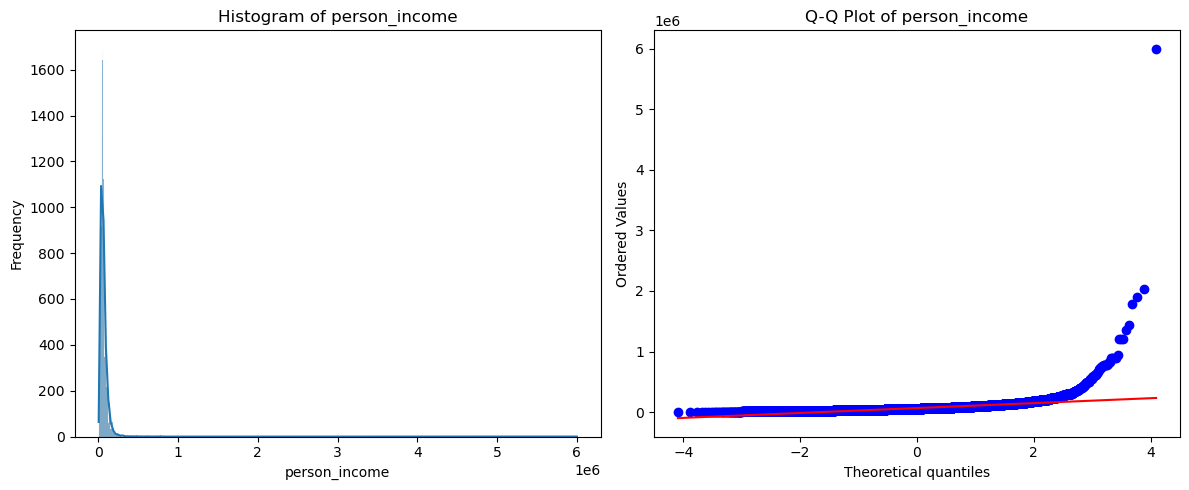

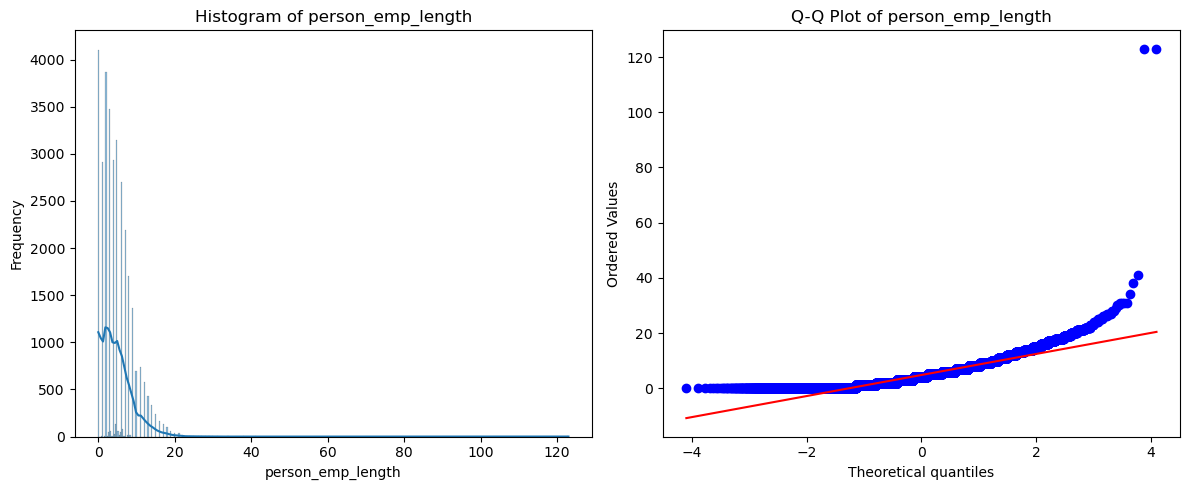

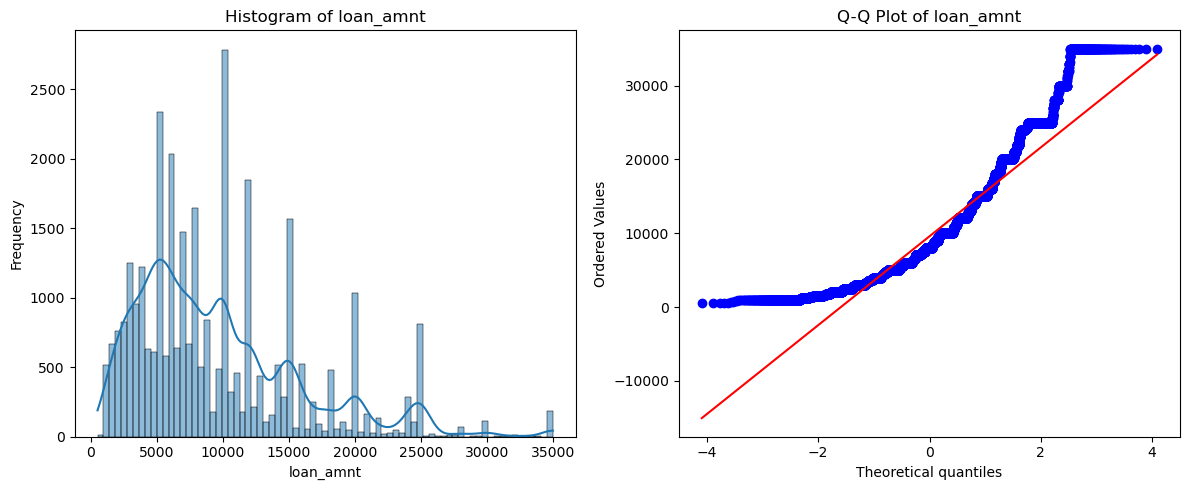

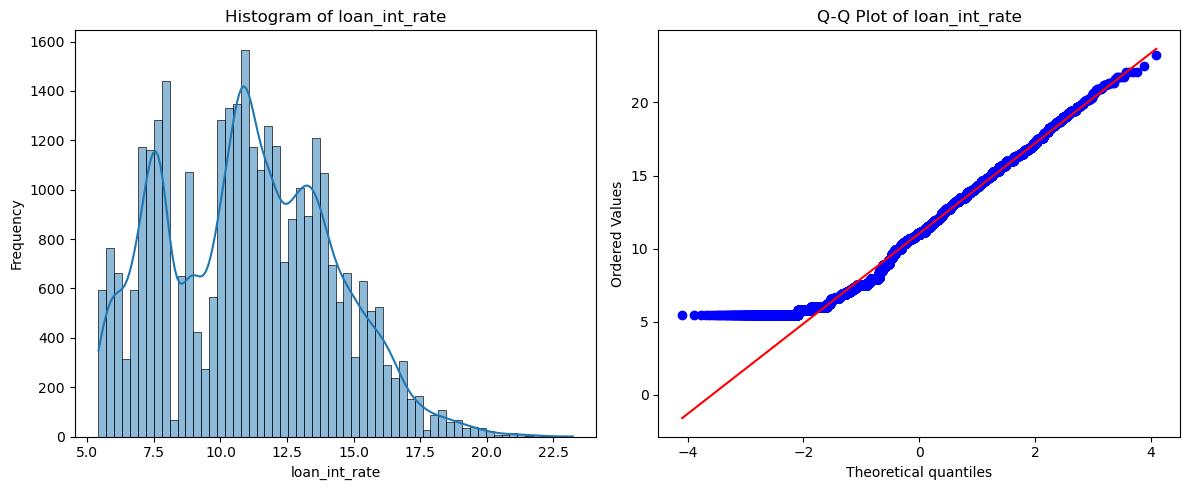

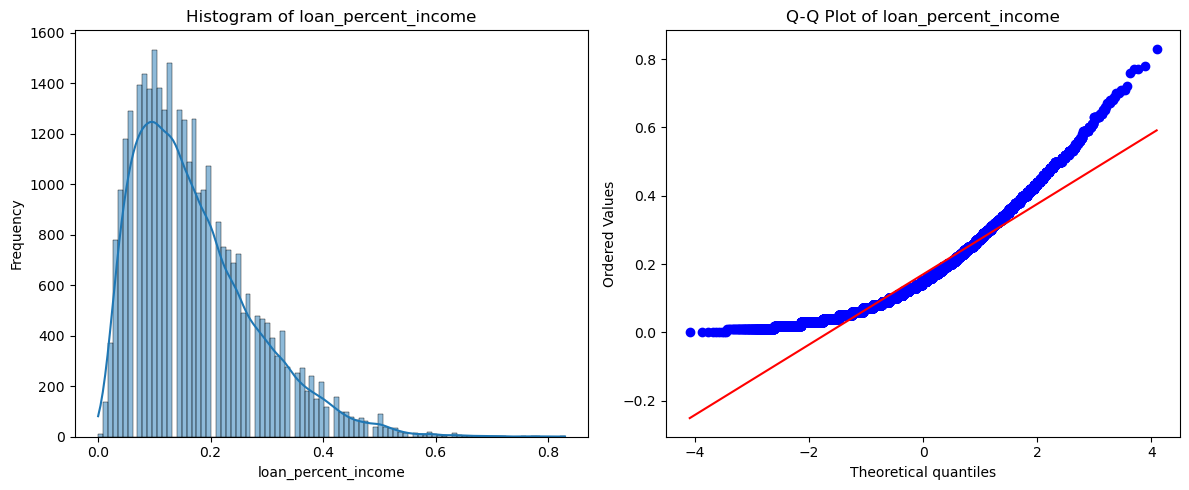

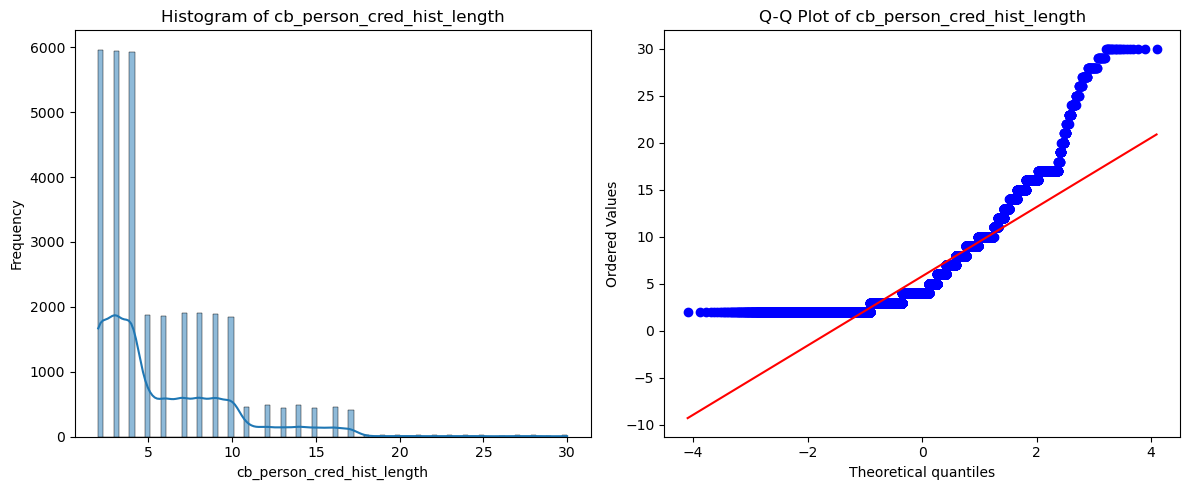

In [42]:

numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Plot histograms and Q-Q plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dataKnn[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(dataKnn[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    
    plt.tight_layout()
    plt.show()
